# Exploring KNN

Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load Dataset

In [ ]:
df = pd.read_csv('heart_disease.csv')

Here, we select 3 features - age, trestbps, chol as X and target as a y

In [ ]:
X = df[['age', 'trestbps', 'chol']]
y = df['target']

Here, We split into train and test in 80-20 (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN without Normalization

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Here, we print accuracy score, confusion matrix and classfication report without normalization.

In [ ]:
print("KNN without Normalization :")
print("Accuracy : ",accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

KNN without Normalization :
Accuracy :  0.5245901639344263
Confusion Matrix:
 [[14 15]
 [14 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49        29
           1       0.55      0.56      0.55        32

    accuracy                           0.52        61
   macro avg       0.52      0.52      0.52        61
weighted avg       0.52      0.52      0.52        61



### KNN with Normalization

Here, we do normalization and make the X_train and X_test in a normalize form.

In [ ]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

Here, we also normalize the KNN.

In [ ]:
knn_norm = KNeighborsClassifier(n_neighbors=5)
knn_norm.fit(X_train_norm, y_train)
y_pred_norm = knn_norm.predict(X_test_norm)

Here, we print accuracy, confusion matrix and classification on the normalize KNN.

In [ ]:
print("\nKNN with Normalization")
print("Accuracy:", accuracy_score(y_test, y_pred_norm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_norm))
print("Classification Report:\n", classification_report(y_test, y_pred_norm))


KNN with Normalization
Accuracy: 0.6557377049180327
Confusion Matrix:
 [[20  9]
 [12 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.69      0.62      0.66        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



Now, we plot KNN accuracy before and after normalization

Text(0, 0.5, 'Accuracy')

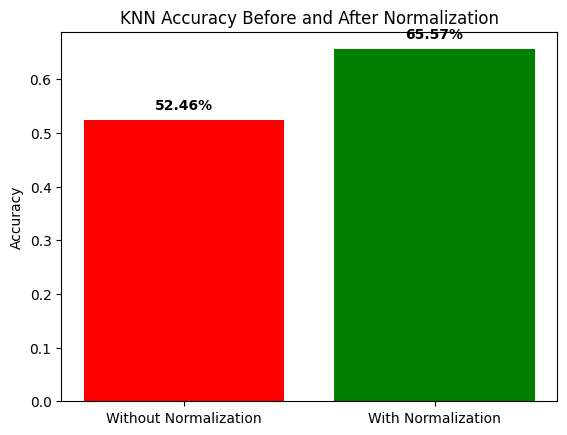

In [ ]:
# accuracy values
accuracy_without_norm = accuracy_score(y_test, y_pred)
accuracy_with_norm = accuracy_score(y_test, y_pred_norm)

categories = ['Without Normalization', 'With Normalization']
accuracy = [accuracy_without_norm, accuracy_with_norm]  # Decimal values for accuracy

# Colors
colors = ['red', 'green']

# Create bar chart
plt.bar(categories, accuracy, color=colors)

# Add percentage labels on bars
for i, value in enumerate(accuracy):
    plt.text(i, value + 0.02, f"{value*100:.2f}%", ha='center', fontweight='bold')

# Titles and labels
plt.title("KNN Accuracy Before and After Normalization")
plt.ylabel("Accuracy")